In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Stereas Elladas'
raceDate = '14-04-2024'
surface = 'Gravel'
competition = 'Greek Championship'

link = 'https://www.ewrc-results.com/results/88521-rally-stereas-elladas-2024/?s='
startat, no_ss=457182, int(5)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []
overall_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data1 = pd.read_html(page_html11)[1]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data1.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','total_time', 'Diff', 'Speed']
    data['ss']=ss+1
    data1['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    equal = '=' in data1['Pos.'].unique()
    if equal:
        data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
        data1['Pos.'] = data1['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data1)
    rally_23.append(data) 
    overall_23.append(data1)

C:\Users\ilias\AppData\Local\Temp\ipykernel_2616\3609136228.py:18: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_2616\3609136228.py:22: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally_overall = pd.concat(overall_23, axis=0)
rally_overall.tail(50)

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss
23,24. +4,#35,Xenokostas George - Pazis S. Toyota Starlet,C5 F2 E,56:41.76,+14:11.47 +38.14,61.8 14.6,3
24,25. +5,#29,Panagiotopoulos M. - Ahtidas E. Toyota Yaris,C6 F2,56:55.85 5:00,+14:25.56 +14.09,67.5 14.8,3
25,26. −10,#20,Antoniou K. - Bourazas E. Ford Escort MK2,C3 F2 E,1:24:36.88,+42:06.59 +27:41.03,41.4 43.3,3
0,1.,#2,Tsolakidis Socratis - Polizois G. Škoda Fabia...,C1,51:09.85,NaN,83.5,4
1,2.,#6,Chatzimarkos P. - Tsaoussoglou M. Renault Cli...,C2,51:47.80,+37.95 +37.95,82.5 0.53,4
2,3.,#5,Karanikolas E. - Kakavas G. Ford Fiesta Rally3,C2,51:58.07,+48.22 +10.27,82.2 0.68,4
3,4.,#10,Panteli Petros - Laos Pambos Renault Clio Rally3,C2,52:03.53,+53.68 +5.46,82.1 0.75,4
4,5.,#4,Halkias Efthimios - Komnos Nikos Renault Clio...,C2,52:14.12,+1:04.27 +10.59,81.8 0.90,4
5,6.,#8,Ismailos Panos - Soukoulis K. Mitsubishi Lanc...,C2,53:14.83,+2:04.98 +1:00.71,80.3 1.75,4
6,7.,#16,Polykarpou Panikos - Votsis G. Peugeot 208 Ra...,C5 F2,53:47.01,+2:37.16 +32.18,79.5 2.21,4


In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally_overall['Pos.'] = rally_overall['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally_overall['Race'] = rallyname
rally_overall['date'] = raceDate
rally_overall['surface'] = surface
rally_overall['competition'] = competition
rally_overall['Crew'] = rally2023_stages['Crew'].str[:14]
rally_overall['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally_overall['cPos']= rally_overall.groupby(['Race', 'ss']).cumcount()+1
rally_overall[['Stages_time', 'Penalty']] = rally_overall['total_time'].str.split(' ', expand=True)
rally_overall['Stages_t_s'], rally_overall['Stages_t_m'], rally_overall['Stages_t_h']= rally_overall['Stages_time'].str[-5:], rally_overall['Stages_time'].str[-8:-6].astype(int), rally_overall['Stages_time'].str[:-9]
rally_overall['Penalty_m'], rally_overall['Penalty_s'] = rally_overall['Penalty'].str[:-3], rally_overall['Penalty'].str[-2:]
rally_overall[['Diff_1st', 'Diff_Pre']] = rally_overall['Diff'].str.split(' +', expand=True)
rally_overall['Diff_1st'] = rally_overall['Diff_1st'].str.replace('+', '')
rally_overall = rally_overall.replace('',0)
rally_overall.fillna(0, inplace=True)
cols = ['Stages_t_h', 'Stages_t_m', 'Stages_t_s', 'Penalty_m', 'Penalty_s']
rally_overall[cols] = rally_overall[cols].apply(pd.to_numeric, errors='coerce', axis=1)
rally_overall['time'] = rally_overall['Stages_t_s'] +  rally_overall['Stages_t_m'] *60 + rally_overall['Stages_t_h'] *3600
#rally_overall.to_csv('trialData.csv', index=False)
rally_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Stages_time,Penalty,Stages_t_s,Stages_t_m,Stages_t_h,Penalty_m,Penalty_s,Diff_1st,Diff_Pre,time
0,1.0,#2,Tsolakidis Soc,C1,17:00.00,0,80.4,1,Stereas Elladas,14-04-2024,...,17:00.00,0,0.00,17.0,0.0,0.0,0.0,0,0,1020.00
1,1.0,#3,Panagiotis Rou,C1,17:00.00,+0.00 +0.00,80.4 0.00,1,Stereas Elladas,14-04-2024,...,17:00.00,0,0.00,17.0,0.0,0.0,0.0,0.00,+0.00,1020.00
2,3.0,#4,Halkias Efthim,C2,17:18.11,+18.11 +18.11,79.0 0.79,1,Stereas Elladas,14-04-2024,...,17:18.11,0,18.11,17.0,0.0,0.0,0.0,18.11,+18.11,1038.11
3,3.0,#5,Karanikolas E.,C2,17:18.11,+18.11 +0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,...,17:18.11,0,18.11,17.0,0.0,0.0,0.0,18.11,+0.00,1038.11
4,3.0,#6,Chatzimarkos P,C2,17:18.11,+18.11 +0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,...,17:18.11,0,18.11,17.0,0.0,0.0,0.0,18.11,+0.00,1038.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,19.,#24,Kotsadam Nikol,C6,1:19:08.02,+16:54.86 +58.97,65.0 11.8,5,Stereas Elladas,14-04-2024,...,1:19:08.02,0,8.02,19.0,1.0,0.0,0.0,16:54.86,+58.97,4748.02
19,20. +1,#29,Yiangou Y. -,C2,1:21:33.21 5:00,+19:20.05 +2:25.19,67.2 13.5,5,Stereas Elladas,14-04-2024,...,1:21:33.21,5:00,33.21,21.0,1.0,5.0,0.0,19:20.05,+2:25.19,4893.21
20,21. +1,#38,Xenokostas Geo,C5,1:22:44.73,+20:31.57 +1:11.52,62.2 14.4,5,Stereas Elladas,14-04-2024,...,1:22:44.73,0,44.73,22.0,1.0,0.0,0.0,20:31.57,+1:11.52,4964.73
21,22. +1,#35,Rahoutis Fanis,C6,1:22:50.98,+20:37.82 +6.25,62.1 14.4,5,Stereas Elladas,14-04-2024,...,1:22:50.98,0,50.98,22.0,1.0,0.0,0.0,20:37.82,+6.25,4970.98


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,NaN
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,NaN
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,NaN
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,NaN
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,NaN
...,...,...,...,...,...,...,...,...,...
18,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07
19,Yiangou Y. -,C2,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,20,853.42
20,Xenokostas Geo,C5,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,21,860.62
21,Rahoutis Fanis,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,22,877.21


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race            ss Gr/Cl             
Stereas Elladas 1  2          1274.08
                   4          1227.36
                   C1             NaN
                   C2         1038.11
                   C3         1150.73
                   C4         1144.85
                   C5         1072.30
                   C6         1206.13
                2  2           777.94
                   4           632.94
                   C1          527.21
                   C2          524.16
                   C3          597.55
                   C4          605.63
                   C5          550.82
                   C6          606.69
                3  4          1344.22
                   C1          992.52
                   C2         1004.74
                   C3         1179.71
                   C4         1152.32
                   C5         1058.73
                   C6         1177.26
                4  C1          519.56
                   C2          520.88
                   C3          611.86
                   C4          597.56
                   C5          545.16
                   C6          605.19
                5  C1          663.31
                   C2          669.47
                   C3          772.31
                   C4          758.35
                   C5          703.98
                   C6          785.72

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,NaN,NaN,1038.11,NaN,NaN,NaN,01
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,NaN,NaN,1038.11,NaN,NaN,NaN,01
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,NaN,1038.11,1038.11,NaN,NaN,NaN,01
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,NaN,1038.11,1038.11,NaN,NaN,NaN,01
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,NaN,1038.11,1038.11,NaN,NaN,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Giokaris S. -,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,13,785.72,785.72,663.31,122.41,0.00,0.000000,05
132,Kassimis Ioann,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,14,787.21,785.72,663.31,123.90,1.49,0.189635,05
133,Panagiotopoulo,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,18,823.85,785.72,663.31,160.54,38.13,4.852874,05
134,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07,785.72,663.31,161.76,39.35,5.008145,05


In [10]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [11]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,263.80,15.04,0.00,1.03,0.00
Antoniou K. -,40.03,0.00,2108.86,0.00,0.00
Chatzigakis Gi,13.87,51.89,NaN,NaN,NaN
Chatzimarkos P,NaN,0.00,19.91,0.00,NaN
Davaris Nikos,127.38,85.46,129.57,99.24,100.68
Delaportas Gio,36.31,29.78,65.60,36.70,35.14
Flandy - Gira,70.85,74.38,95.56,53.24,73.86
Giokaris S. -,12.06,0.00,9.71,0.00,0.00
Halkias Efthim,NaN,24.68,12.48,9.07,6.73


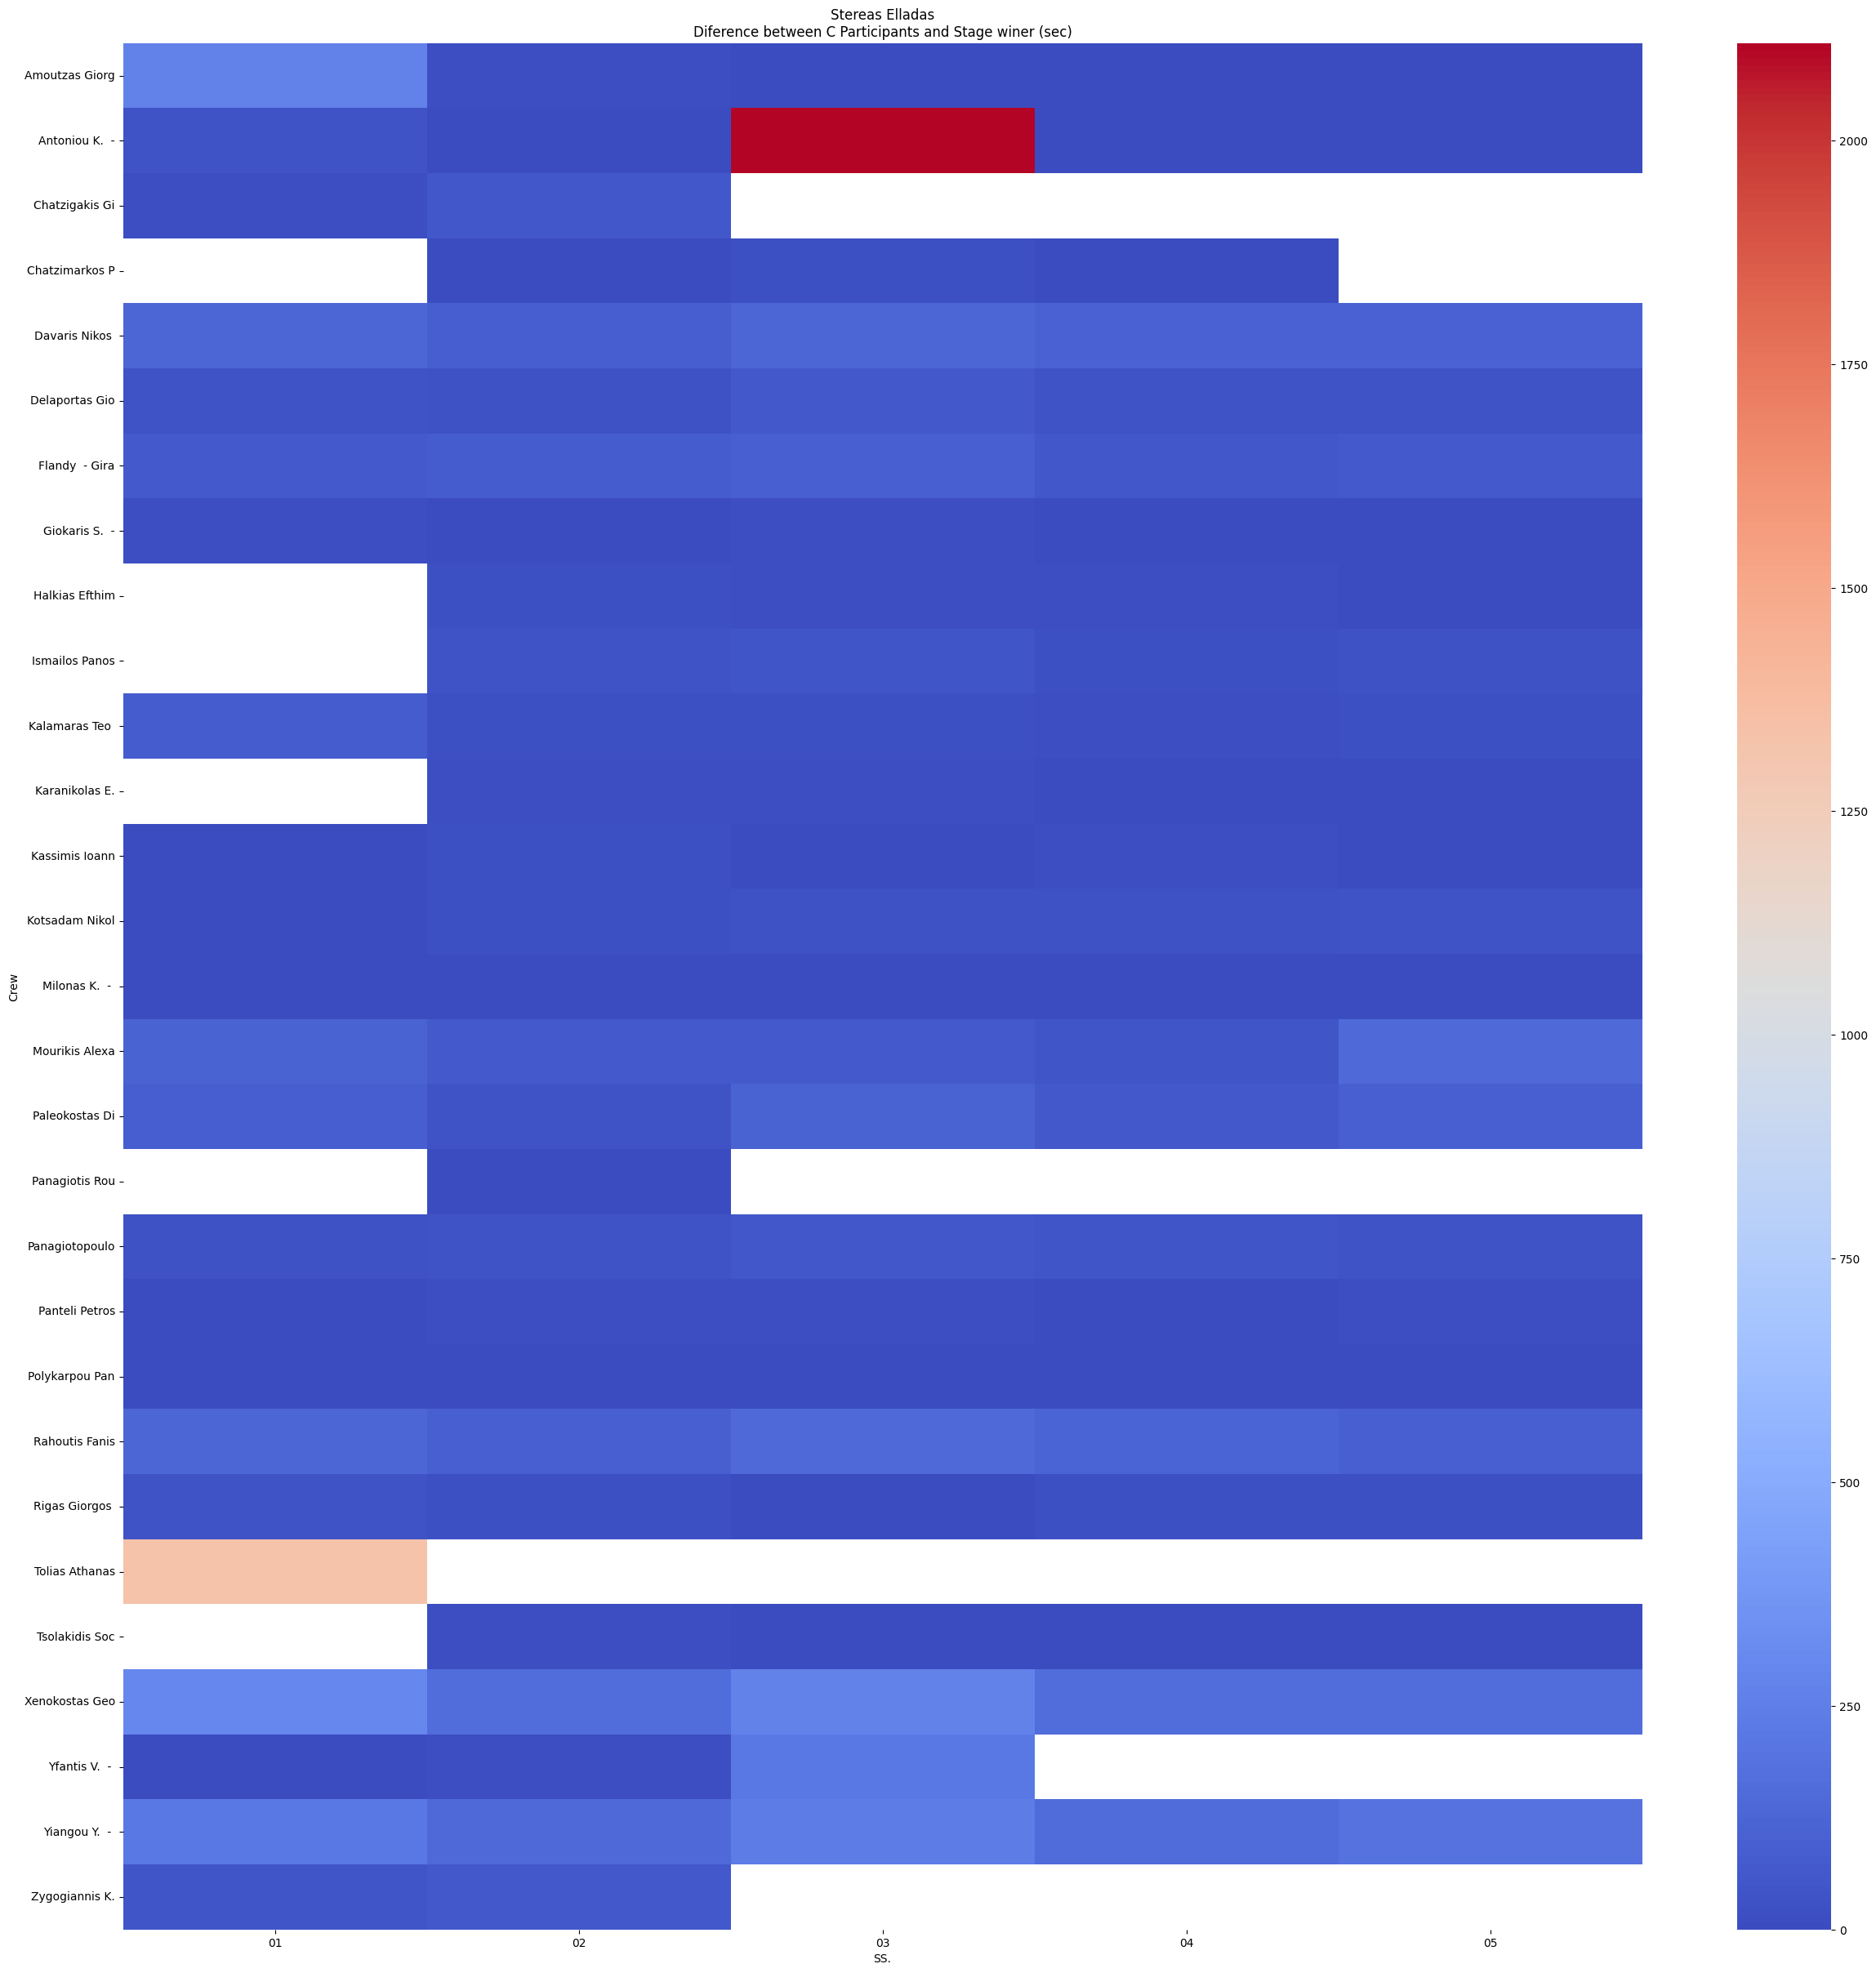

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

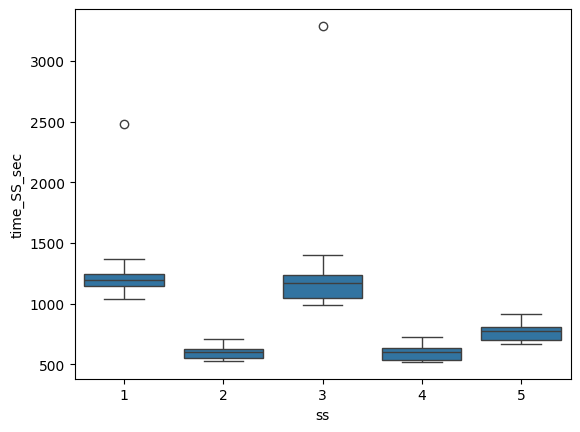

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

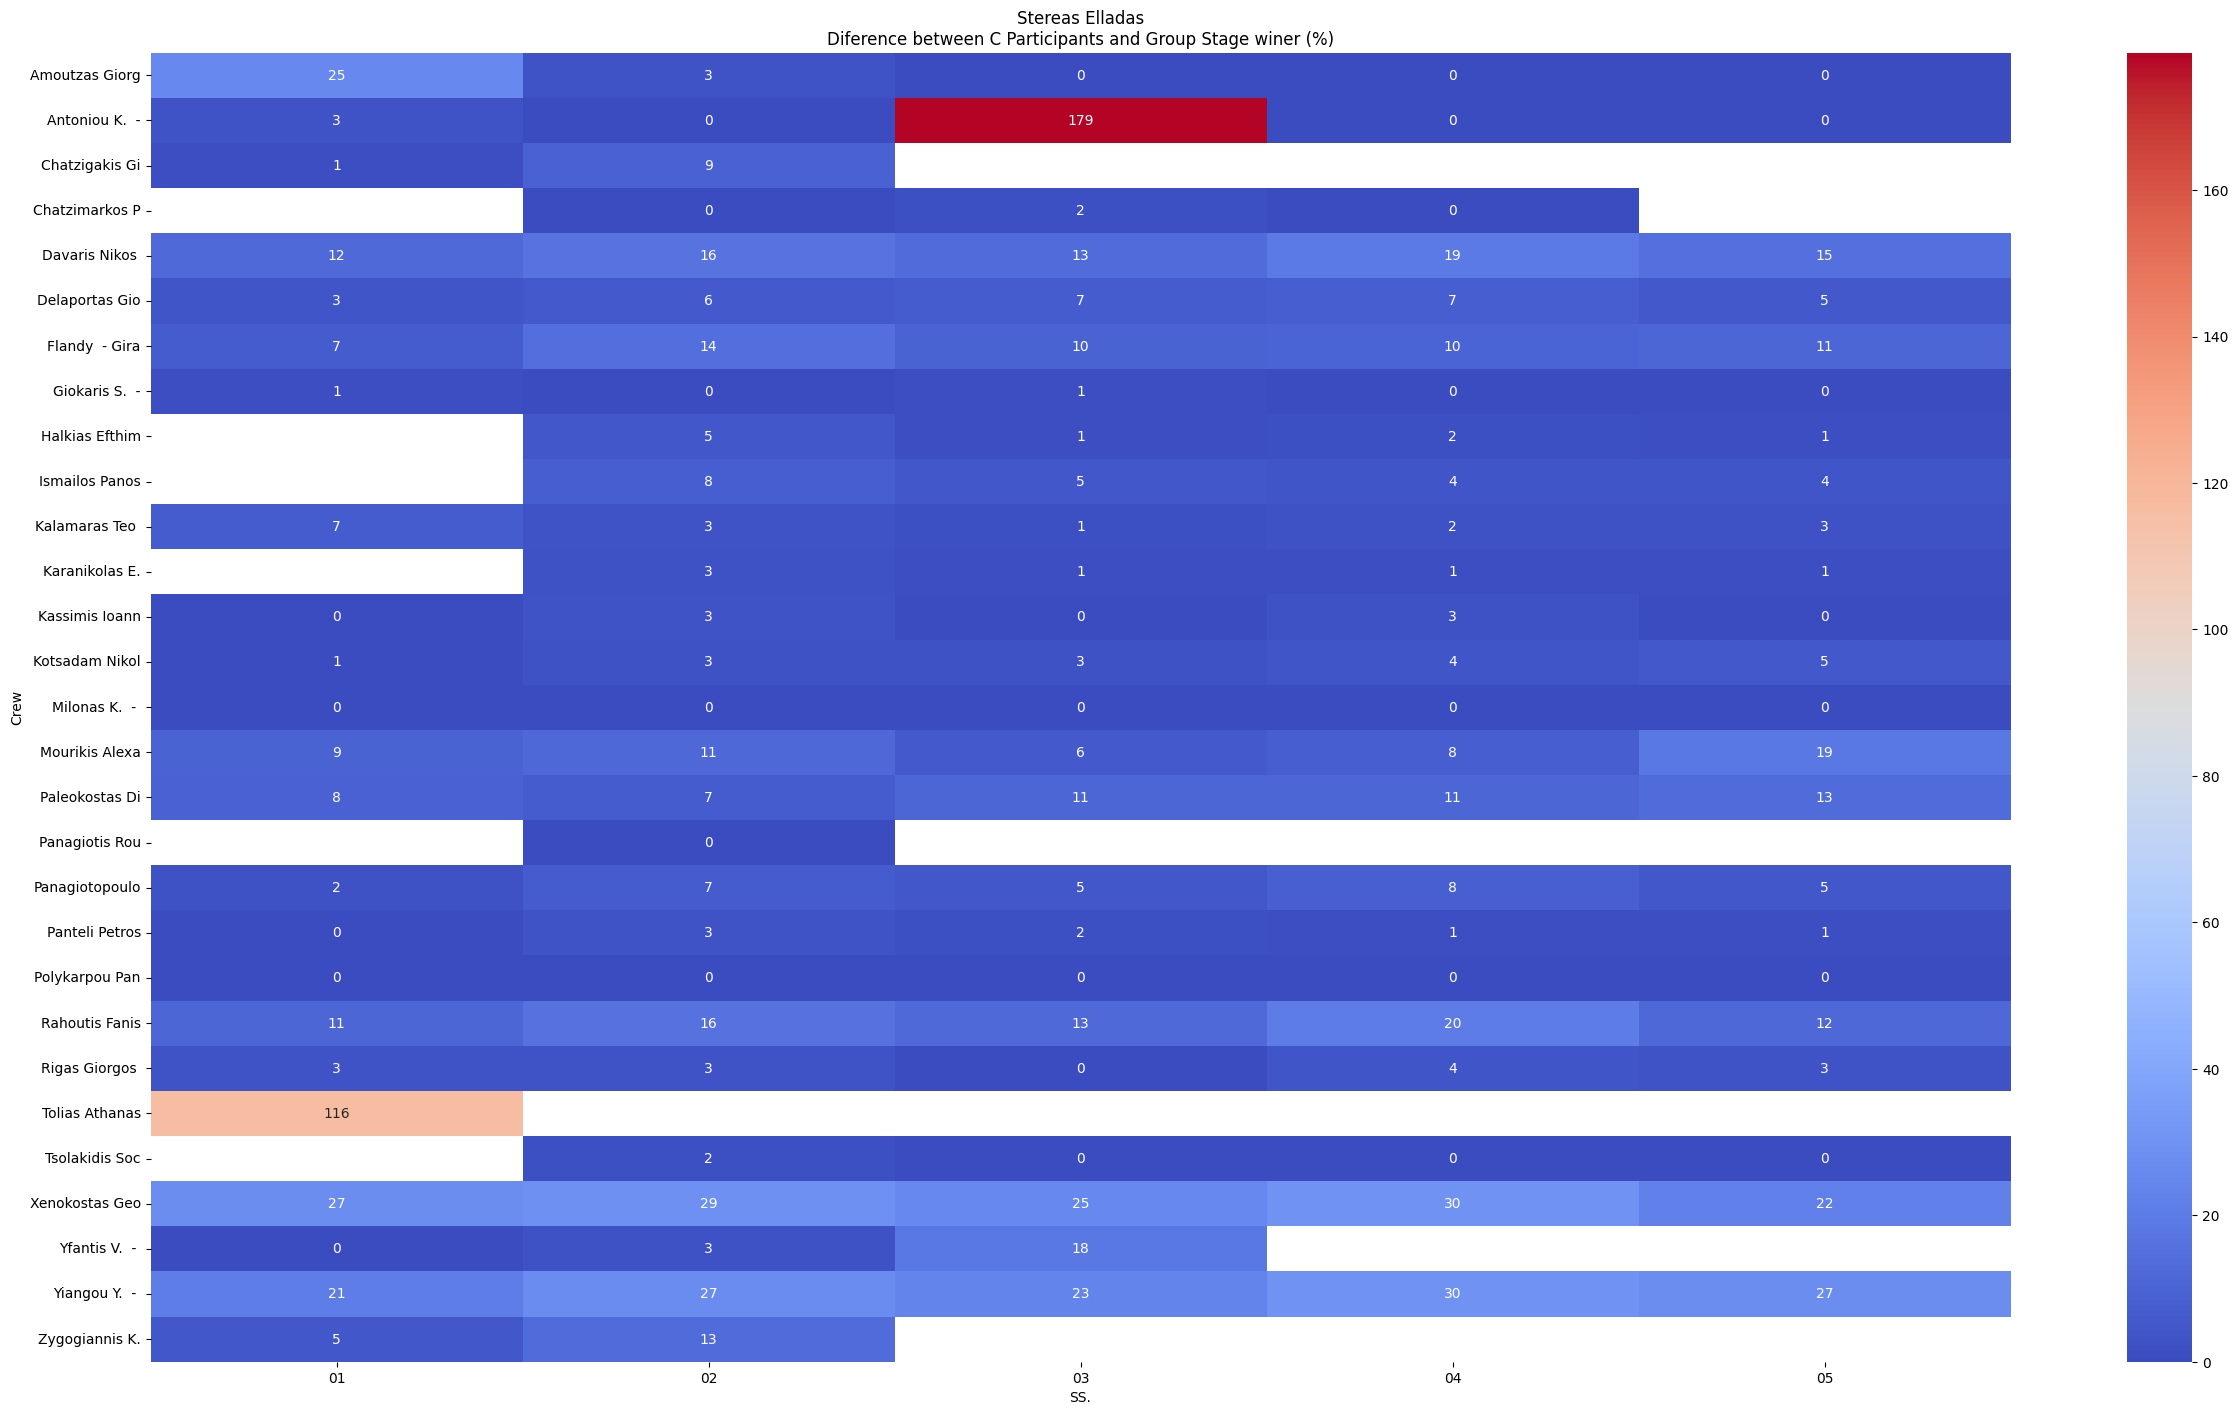

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [15]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Tsolakidis Soc,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,1,NaN,NaN,1038.11,NaN,NaN,NaN,01
1,Panagiotis Rou,C1,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,2,NaN,NaN,1038.11,NaN,NaN,NaN,01
2,Halkias Efthim,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,3,NaN,1038.11,1038.11,NaN,NaN,NaN,01
3,Karanikolas E.,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,4,NaN,1038.11,1038.11,NaN,NaN,NaN,01
4,Chatzimarkos P,C2,1,Stereas Elladas,14-04-2024,Gravel,Greek Championship,5,NaN,1038.11,1038.11,NaN,NaN,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Giokaris S. -,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,13,785.72,785.72,663.31,122.41,0.00,0.000000,05
132,Kassimis Ioann,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,14,787.21,785.72,663.31,123.90,1.49,0.189635,05
133,Panagiotopoulo,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,18,823.85,785.72,663.31,160.54,38.13,4.852874,05
134,Kotsadam Nikol,C6,5,Stereas Elladas,14-04-2024,Gravel,Greek Championship,19,825.07,785.72,663.31,161.76,39.35,5.008145,05


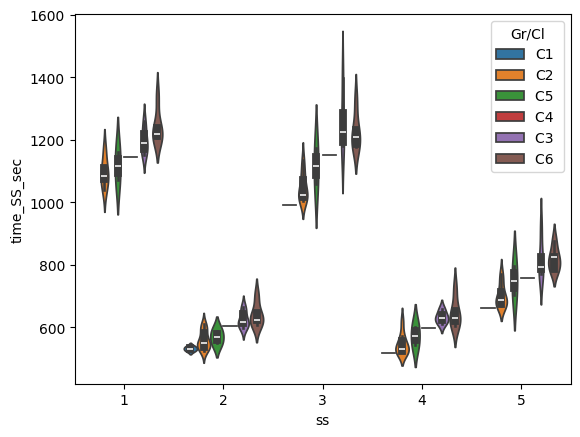

In [16]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

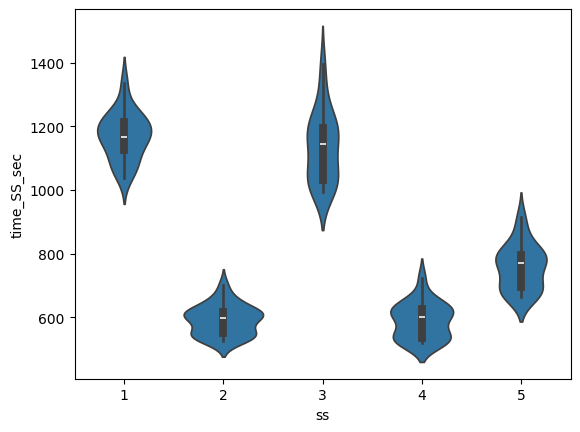

In [17]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [18]:
Thiva = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1) & (ss_times_FIXED["ss"] < 5)]
Elikonas = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

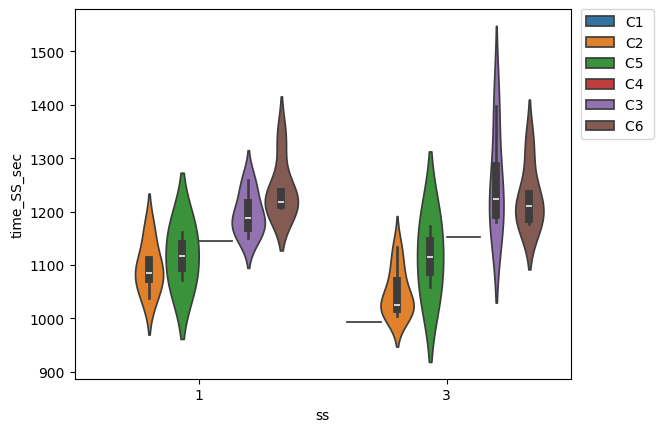

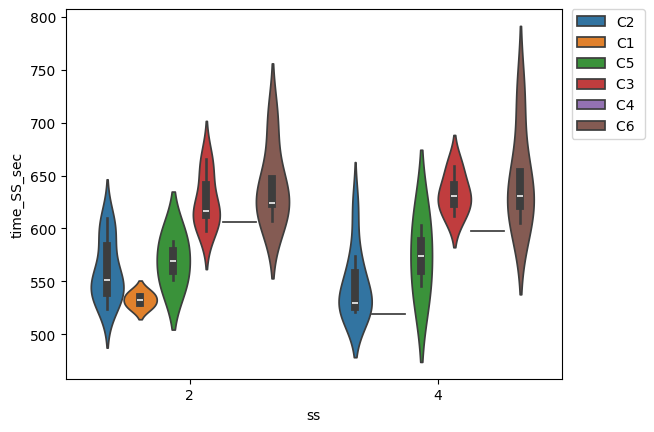

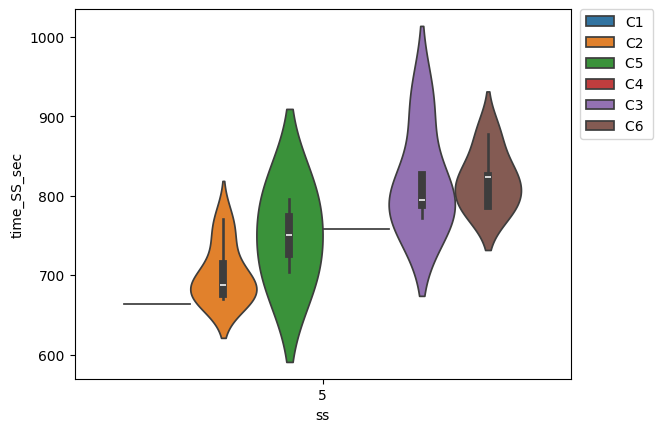

In [19]:
fig.set_size_inches(20,15)
sns.violinplot( y=Thiva["time_SS_sec"], x=Thiva["ss"], hue = Thiva["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,20)
sns.violinplot( y=Elikonas["time_SS_sec"], x=Elikonas["ss"], hue = Elikonas["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
fig.set_size_inches(30,25)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')

In [20]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [21]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,263.80,15.04,0.00,1.03,0.00
Chatzimarkos P,NaN,0.00,19.91,0.00,NaN
Davaris Nikos,127.38,85.46,129.57,99.24,100.68
Delaportas Gio,36.31,29.78,65.60,36.70,35.14
Flandy - Gira,70.85,74.38,95.56,53.24,73.86
Halkias Efthim,NaN,24.68,12.48,9.07,6.73
Ismailos Panos,NaN,40.09,45.49,21.36,26.88
Karanikolas E.,NaN,14.64,10.42,5.12,5.33
Panagiotis Rou,NaN,0.00,NaN,NaN,NaN


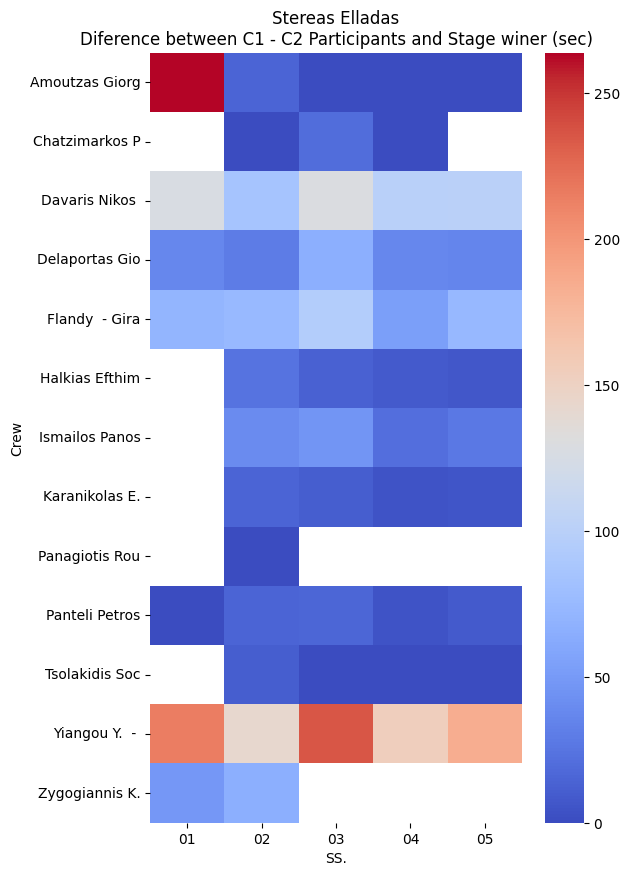

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(6,10)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [23]:
min_value_overall = rally_overall.groupby(['Race', 'ss'])['time'].min()
min_value_overall_G = rally_overall.groupby(['Race', 'ss', 'Gr/Cl'])['time'].min()
#min_value = pd.DataFrame(min_value)

min_value_overall_2 =  pd.DataFrame(min_value_overall)
min_value_overall_2_G =  pd.DataFrame(min_value_overall_G)

min_value_overall_2_G = min_value_overall_2_G.rename(columns={'time' : 'min_time_Gr'})
min_value_overall_2 = min_value_overall_2.rename(columns={'time' : 'min_time'})
min_value_overall_2_G

min_time_Gr
Race            ss Gr/Cl             
Stereas Elladas 1  2          1301.91
                   4          1227.36
                   C1         1020.00
                   C2         1038.11
                   C3         1150.73
                   C4         1144.85
                   C5         1072.30
                   C6         1206.13
                2  2          2183.32
                   4          1843.21
                   C1         1557.77
                   C2         1547.21
                   C3         1750.69
                   C4         1775.11
                   C5         1623.12
                   C6         1788.31
                3  4          3401.76
                   C1         2550.29
                   C2         2586.92
                   C3         3007.84
                   C4         2909.42
                   C5         2698.70
                   C6         2980.37
                4  C1         3069.85
                   C2         3107.80
                   C3         3615.07
                   C4         3500.36
                   C5         3256.28
                   C6         3529.54
                5  C1         3733.16
                   C2         3792.87
                   C3         4322.32
                   C4         4258.71
                   C5         3960.89
                   C6         4402.76

In [25]:
ss_times_F_G_overall = rally_overall.merge(min_value_overall_2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F_overall = ss_times_F_G_overall.merge(min_value2, on=['Race', 'ss'])
ss_times_F_overall['diff']=ss_times_F_overall['time'] - ss_times_F_overall['min_time']
ss_times_F_overall['diff_G']=ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr']
ss_times_F_overall['diff_G%']=(ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr'])/ss_times_F_overall['min_time_Gr']*100
ss_times_F_overall['SS.']=ss_times_F_overall['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,...,Penalty_s,Diff_1st,Diff_Pre,time,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,1.0,#2,Tsolakidis Soc,C1,17:00.00,0,80.4,1,Stereas Elladas,14-04-2024,...,0.0,0,0,1020.00,1020.00,1038.11,-18.11,0.00,0.000000,01
1,1.0,#3,Panagiotis Rou,C1,17:00.00,+0.00 +0.00,80.4 0.00,1,Stereas Elladas,14-04-2024,...,0.0,0.00,+0.00,1020.00,1020.00,1038.11,-18.11,0.00,0.000000,01
2,3.0,#4,Halkias Efthim,C2,17:18.11,+18.11 +18.11,79.0 0.79,1,Stereas Elladas,14-04-2024,...,0.0,18.11,+18.11,1038.11,1038.11,1038.11,0.00,0.00,0.000000,01
3,3.0,#5,Karanikolas E.,C2,17:18.11,+18.11 +0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,...,0.0,18.11,+0.00,1038.11,1038.11,1038.11,0.00,0.00,0.000000,01
4,3.0,#6,Chatzimarkos P,C2,17:18.11,+18.11 +0.00,79.0 0.79,1,Stereas Elladas,14-04-2024,...,0.0,18.11,+0.00,1038.11,1038.11,1038.11,0.00,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,13. +2,#37,Giokaris S. -,C6,1:13:22.76,+11:09.60 +1:20.44,70.1 7.81,5,Stereas Elladas,14-04-2024,...,0.0,11:09.60,+1:20.44,4402.76,4402.76,663.31,3739.45,0.00,0.000000,05
132,14.,#18,Kassimis Ioann,C6,1:13:30.70,+11:17.54 +7.94,70.0 7.90,5,Stereas Elladas,14-04-2024,...,0.0,11:17.54,+7.94,4410.70,4402.76,663.31,3747.39,7.94,0.180341,05
133,18. +2,#27,Panagiotopoulo,C6,1:18:09.05,+15:55.89 +3:07.76,65.8 11.2,5,Stereas Elladas,14-04-2024,...,0.0,15:55.89,+3:07.76,4689.05,4402.76,663.31,4025.74,286.29,6.502512,05
134,19.,#24,Kotsadam Nikol,C6,1:19:08.02,+16:54.86 +58.97,65.0 11.8,5,Stereas Elladas,14-04-2024,...,0.0,16:54.86,+58.97,4748.02,4402.76,663.31,4084.71,345.26,7.841899,05


In [29]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_combine = ss_times_F_overall[ss_times_F_overall['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_combine.to_csv(str(rallyname) + str(Group) + '_classification.csv')
ss_times_combine.columns

Index(['Pos.', 'No', 'Crew', 'Gr/Cl', 'total_time', 'Diff', 'Speed', 'ss',
       'Race', 'date', 'surface', 'competition', 'cPos', 'Stages_time',
       'Penalty', 'Stages_t_s', 'Stages_t_m', 'Stages_t_h', 'Penalty_m',
       'Penalty_s', 'Diff_1st', 'Diff_Pre', 'time', 'min_time_Gr', 'min_time',
       'diff', 'diff_G', 'diff_G%', 'SS.'],
      dtype='object')

In [32]:
ss_times_F3_overall =ss_times_combine.drop(['Gr/Cl','time','cPos', 'ss'], axis=1)
ss_times_F4_group = pd.pivot_table(ss_times_F3_overall, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4_overall = pd.pivot_table(ss_times_F3_overall, values='diff', index='Crew', columns=['SS.'])
ss_times_F4_overall

SS.,01,02,03,04,05
Crew,,,,,
Amoutzas Giorg,299.00,1062.79,1594.40,2598.51,3129.56
Antoniou K. -,152.65,1226.53,4084.36,3095.51,3659.01
Chatzigakis Gi,126.49,1395.81,NaN,NaN,NaN
Chatzimarkos P,0.00,1023.05,1660.07,2588.24,NaN
Davaris Nikos,127.38,1276.50,1910.28,3097.48,3636.38
Delaportas Gio,36.31,1104.20,1815.28,2848.20,3373.92
Flandy - Gira,70.85,1239.12,1853.33,2862.36,3461.94
Giokaris S. -,180.08,1264.15,2019.33,3009.98,3739.45
Halkias Efthim,0.00,1078.20,1605.23,2675.27,3147.01


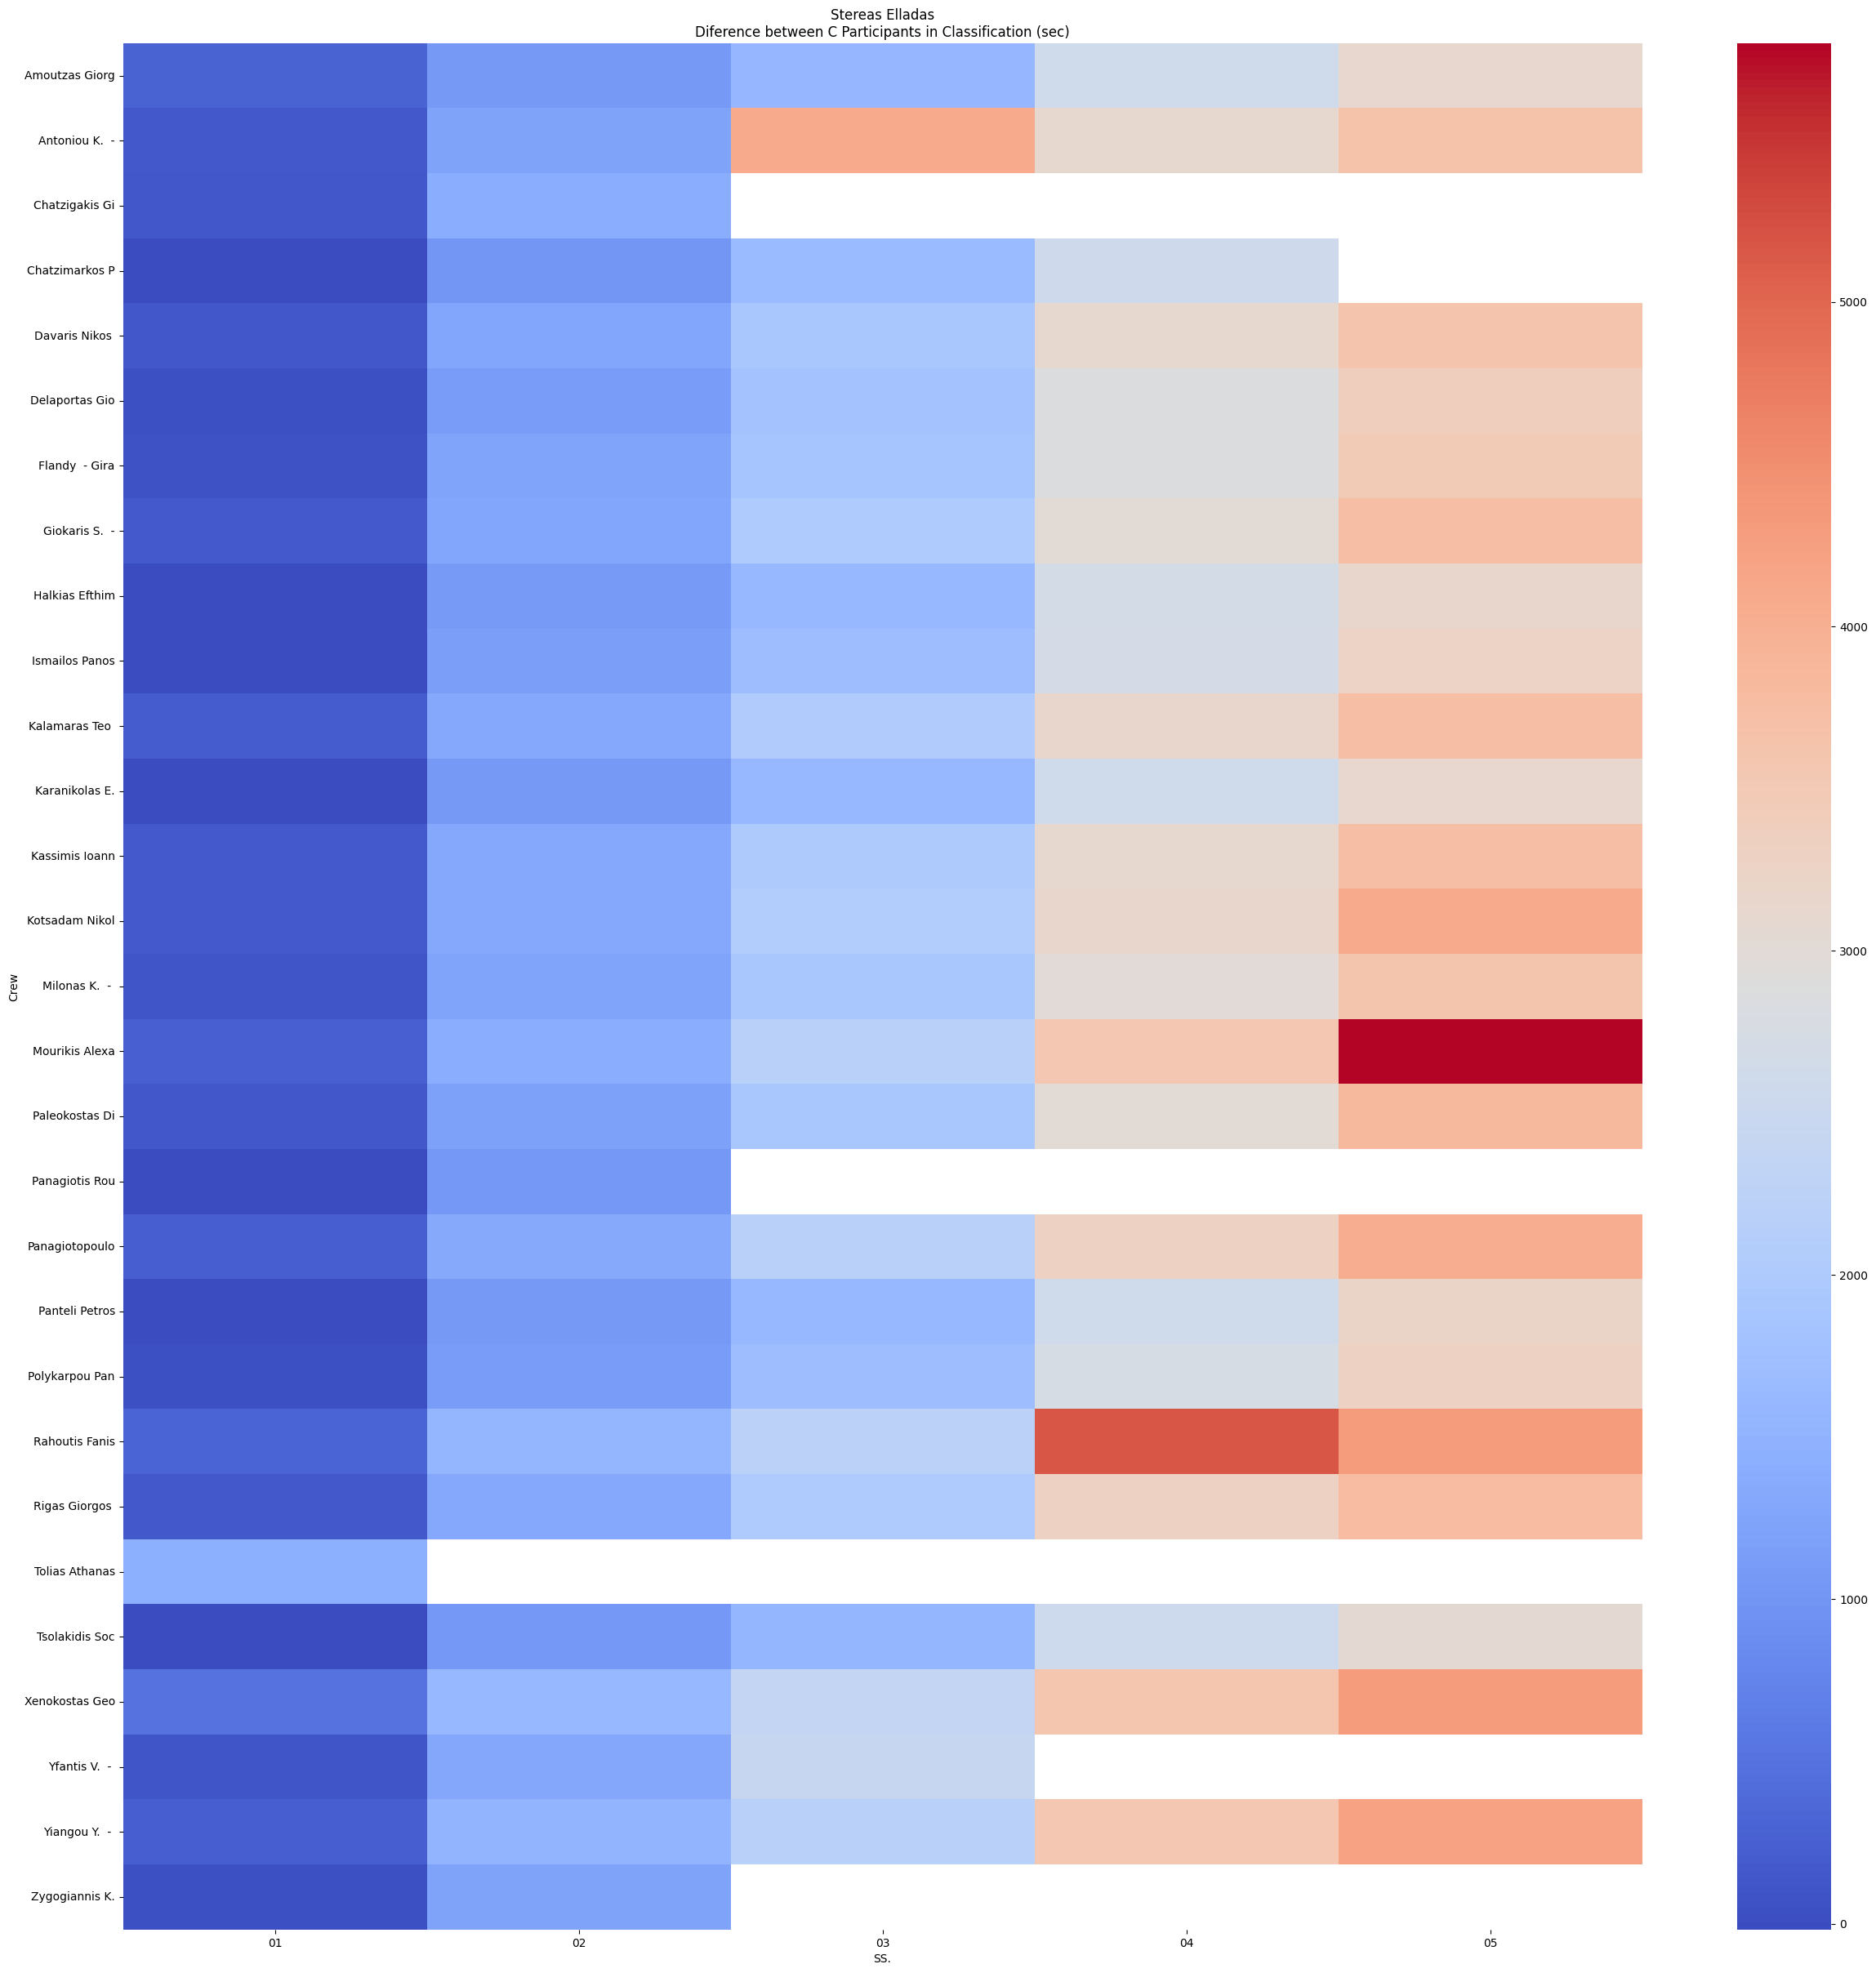

In [33]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_overall, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_" + Group + rallyname + ".png")
plt.show()

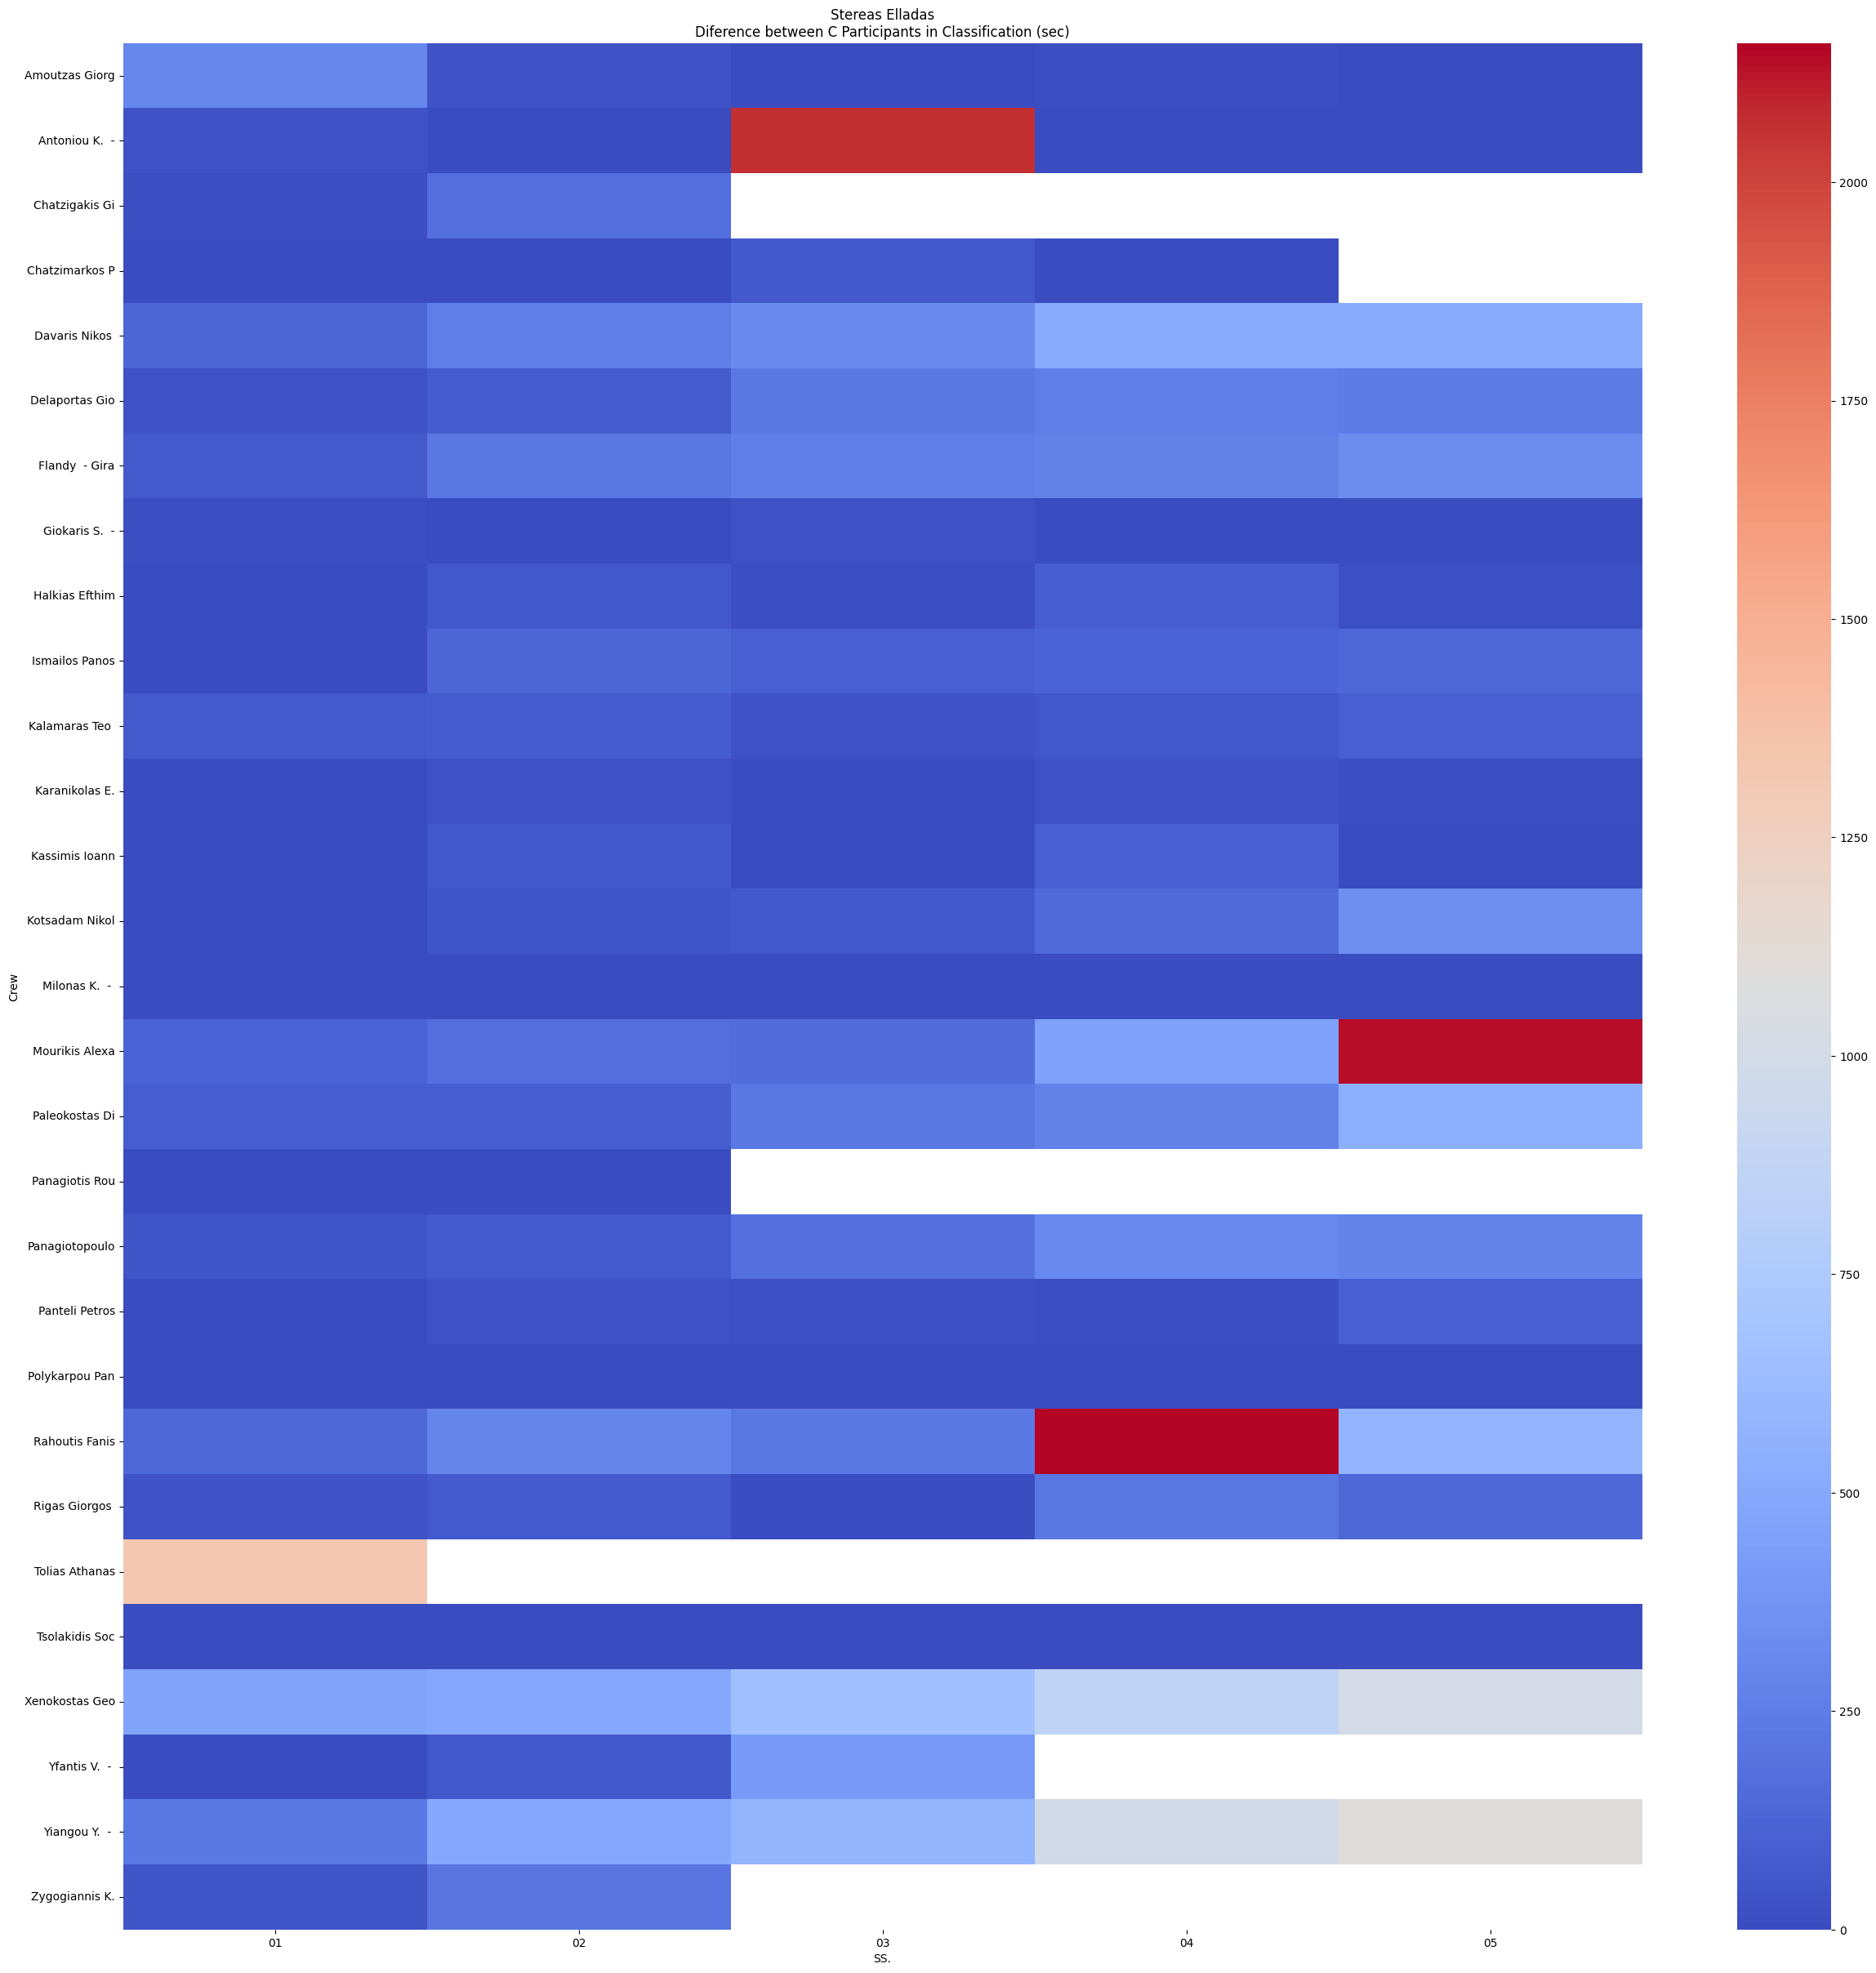

In [34]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_group, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_Group" + Group + rallyname + ".png")
plt.show()